## 第一題
> https://plot.ly/scikit-learn/plot-mini-batch-kmeans/

In [0]:
# import plotly.plotly as py
# 上面的是線上版需要API key
import plotly as py
import plotly.graph_objs as go
from plotly import tools

import time
import numpy as np

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [0]:
#  產生資料
np.random.seed(0)

batch_size = 45
# 給定三個類別的中心
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = 3
X, labels_true = make_blobs(n_samples=2000, centers=centers, cluster_std=0.7)

In [0]:
# Kmeans 模型參數設定
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

# MiniBatchKMeans 模型參數設定
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [0]:
# plot設定
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)
# 設定圖標
fig = tools.make_subplots(rows=1, cols=3,
                          print_grid=False,
                          subplot_titles=('KMeans<br>train time: %.2fs\ninertia: %f' %
                                          (t_mini_batch, mbk.inertia_),
                                          'MiniBatchKmeans<br>train time: %.2fs\ninertia: %f' %
                                          (t_mini_batch, mbk.inertia_), 
                                          'Difference'))

In [0]:
# 做kmeans圖
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    kmeans1 = go.Scatter(x=X[my_members, 0], y=X[my_members, 1],
                         showlegend=False,
                         mode='markers', marker=dict(color=col, size=4))
    kmeans2 = go.Scatter(x=[cluster_center[0]], y=[cluster_center[1]],
                         showlegend=False,
                         mode='markers', marker=dict(color=col, size=14,
                                                    line=dict(color='black',
                                                              width=1)))
    fig.append_trace(kmeans1, 1, 1)
    fig.append_trace(kmeans2, 1, 1)
 
 # 設定axis 1也就是第一張小圖
fig['layout']['xaxis1'].update(showticklabels=False, ticks='',
                               zeroline=False, showgrid=False)
fig['layout']['yaxis1'].update(showticklabels=False, ticks='',
                               zeroline=False, showgrid=False)

layout.YAxis({
    'anchor': 'x', 'domain': [0.0, 1.0], 'showgrid': False, 'showticklabels': False, 'ticks': '', 'zeroline': False
})

In [0]:
# 做MiniBatchKMeans圖
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    minibatchkmeans1 = go.Scatter(x=X[my_members, 0], y=X[my_members, 1],
                                 showlegend=False,
                                 mode='markers', marker=dict(color=col, size=4))
    minibatchkmeans2 = go.Scatter(x=[cluster_center[0]], y=[cluster_center[1]],
                                 showlegend=False,
                                 mode='markers', marker=dict(color=col, size=14,
                                                            line=dict(color='black',
                                                                      width=1)))
    fig.append_trace(minibatchkmeans1, 1, 2)
    fig.append_trace(minibatchkmeans2, 1, 2)

fig['layout']['xaxis2'].update(showticklabels=False, ticks='',
                               zeroline=False, showgrid=False)
fig['layout']['yaxis2'].update(showticklabels=False, ticks='',
                               zeroline=False, showgrid=False)

layout.YAxis({
    'anchor': 'x2', 'domain': [0.0, 1.0], 'showgrid': False, 'showticklabels': False, 'ticks': '', 'zeroline': False
})

In [0]:
# 做比較圖
different = (mbk_means_labels == 4)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
difference1 = go.Scatter(x=X[identic, 0], y=X[identic, 1],
                         showlegend=False,
                         mode='markers', marker=dict(color='#bbbbbb', size=4))
        
difference2 = go.Scatter(x=X[different, 0], y=X[different, 1], 
                         showlegend=False,
                         mode='markers', marker=dict(color='magenta', size=4))

fig.append_trace(difference1, 1, 3)
fig.append_trace(difference2, 1, 3)

fig['layout']['xaxis3'].update(showticklabels=False, ticks='',
                               zeroline=False, showgrid=False)
fig['layout']['yaxis3'].update(showticklabels=False, ticks='',
                               zeroline=False, showgrid=False)

layout.YAxis({
    'anchor': 'x3', 'domain': [0.0, 1.0], 'showgrid': False, 'showticklabels': False, 'ticks': '', 'zeroline': False
})

In [0]:
# 一次一起顯示圖
# py.iplot(fig)
# 存到本機端
py.offline.plot( fig, filename='d3-cloropleth-map' )

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:635: UserWarning:

Your filename `d3-cloropleth-map` didn't end with .html. Adding .html to the end of your file.



'file:///content/d3-cloropleth-map.html'

## 第二題
> https://pythonprogramminglanguage.com/kmeans-elbow-method/

> https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [0]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
DF = pd.read_csv('Wholesale customers data.csv')

# 類別型資料
categorical_features = ['Channel', 'Region']
# 數值型資料
# continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

data = DF.copy()
# 做one hot encoding
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
    
# 做normailization
minMax = MinMaxScaler()
minMax.fit(data)
X = minMax.transform(data)

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel = kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
   
    # 方法二
#     distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

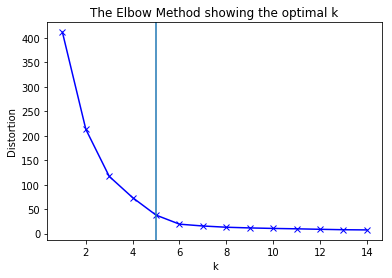

In [0]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
# K=5是elbow point
plt.axvline(x=5, label = 'elbow point')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
distortions

[411.82878995921095,
 213.39898477020844,
 117.07252399254907,
 73.63235109910806,
 37.922437718162826,
 19.418928179725288,
 15.67916418107215,
 13.129100808295878,
 11.733181190386384,
 10.685173127085228,
 9.90769994117695,
 8.926663411681483,
 8.039458598024195,
 7.652212259935403]